In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import data
df=pd.read_csv("wine.data")

In [4]:
df.head(100)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
96,2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428
97,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
98,2,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406


In [5]:
#assign columns names
df.columns=['Target','alcohol',
                     'malic_acid',
                     'ash',
                     'alcalinity_of_ash',
                     'magnesium',
                     'total_phenols',
                     'flavanoids',
                     'nonflavanoid_phenols',
                     'proanthocyanins',
                     'color_intensity',
                     'hue',
                     'od280/od315_of_diluted_wines',
                     'proline']

In [6]:
df.head()

,Target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
# df.Target.replace(1, 'class_1',inplace=True)
# df.Target.replace(2, 'class_2',inplace=True)
# df.Target.replace(3, 'class_3',inplace=True)
df.Target.unique()

array([1, 2, 3], dtype=int64)

In [8]:
X=df.drop('Target',axis=1)
y=df['Target']

In [9]:
y.shape

(177,)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# class-wise distribution of data in the train set

In [35]:
train_plot=X_train.groupby(y_train).mean()
train_plot

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Target,,,,,,,,,,,,,
1,13.673590,1.928974,2.441795,16.989744,104.282051,2.76641,2.904872,0.289231,1.851026,5.508718,1.069231,3.163590,1119.282051
2,12.292000,1.796200,2.265400,20.508000,94.740000,2.27860,2.112000,0.349200,1.607200,3.047000,1.064120,2.808000,522.060000
3,13.200882,3.367353,2.425000,21.220588,99.617647,1.65500,0.802647,0.433529,1.131765,7.410882,0.685294,1.627941,624.852941


<AxesSubplot:xlabel='Target'>

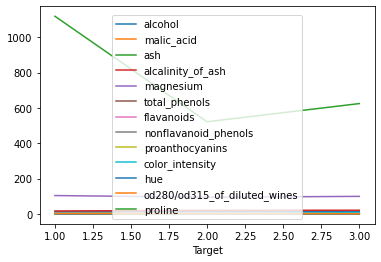

In [36]:
train_plot.plot()

drop Magenesium and propline , because they are dissturbing the plot

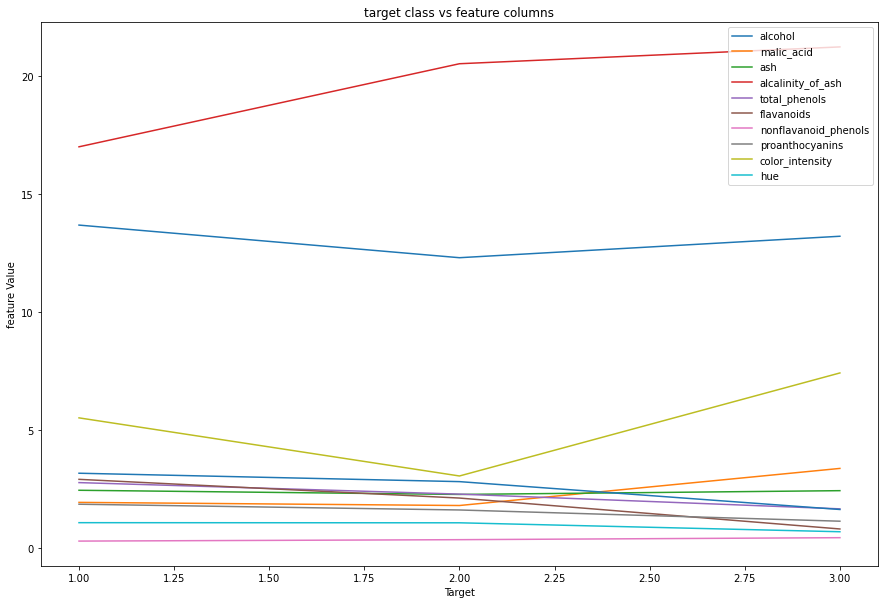

In [58]:
plt.figure(figsize=(15,10))
train_plot_new=train_plot.drop(['magnesium','proline'],axis=1)
plt.plot(train_plot_new,label=['alcohol']
                    )
plt.title("target class vs feature columns")
plt.xlabel('Target')
plt.ylabel('feature Value')
plt.legend(['alcohol',
                     'malic_acid',
                     'ash',
                     'alcalinity_of_ash','total_phenols',
                     'flavanoids',
                     'nonflavanoid_phenols',
                     'proanthocyanins',
                     'color_intensity',
                     'hue'])

plt.show()

observation:

    1-except alcalinity_ash,alcohol,color_intensity all other feature values are almost same in all the target class.
    
    2-alcohol and color_intensity decrese in class 2
    
    3-alcalinity_ash remain same in bith class 2 and 3 which is more than class 1

# class-wise distribution of data in the test set

In [54]:
test_plot=X_test.groupby(y_test).mean()
test_plot

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Target,,,,,,,,,,,,,
1,13.865263,2.194211,2.485263,17.210526,109.473684,2.993684,3.137368,0.292105,1.977895,5.562632,1.048421,3.105789,1111.052632
2,12.247143,2.257619,2.195714,19.595238,94.095238,2.211905,2.006667,0.398095,1.685238,3.180952,1.037619,2.731429,513.428571
3,13.039286,3.252143,2.466429,21.892857,98.571429,1.736429,0.730000,0.481429,1.206429,7.360714,0.676429,1.818571,642.142857


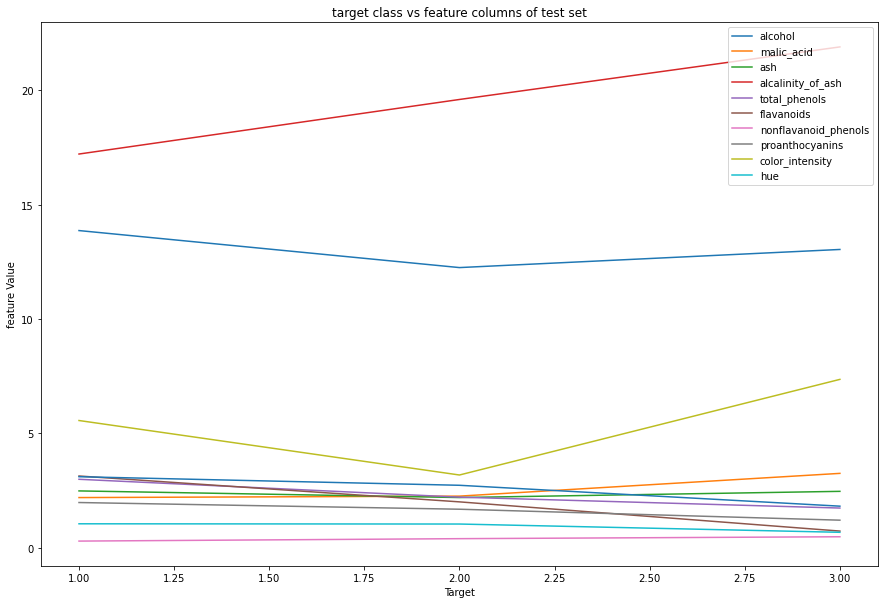

In [55]:
plt.figure(figsize=(15,10))
test_plot_new=test_plot.drop(['magnesium','proline'],axis=1)
plt.plot(test_plot_new,label=['alcohol']
                    )
plt.title("target class vs feature columns of test set")
plt.xlabel('Target')
plt.ylabel('feature Value')
plt.legend(['alcohol',
                     'malic_acid',
                     'ash',
                     'alcalinity_of_ash','total_phenols',
                     'flavanoids',
                     'nonflavanoid_phenols',
                     'proanthocyanins',
                     'color_intensity',
                     'hue'])

plt.show()

same trend also observed in test set as it was observed in train test

# Q-2 Part-A

# Train Naive bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = gb.predict(X_test)

# accuracy

In [13]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 94.44444444444444


# confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 19,  2],
       [ 0,  0, 14]], dtype=int64)

# Class priors

In [15]:
Prior_p=X_train.groupby(y_train).apply(lambda x:len(x))/X_train.shape[0]
Prior_p

Target
1    0.317073
2    0.406504
3    0.276423
dtype: float64

class 1 ,class 2  and class 3 are in the ration of 32 ,40 ,28in the dataset.

In [16]:
X_train.shape

(123, 13)

In [17]:
Prior_Count=X_train.groupby(y_train).apply(lambda x:len(x))
Prior_Count

Target
1    39
2    50
3    34
dtype: int64

# observation

class 1 ,class 2 and class 3 are in the ration of 32 ,40 ,28 respectively and their are 39,50,34 respectively.

# mean and standard deviation for each feature grouped by Target

In [18]:
X_train_mean=X_train.groupby(y_train).apply(np.mean)
X_train_std=X_train.groupby(y_train).apply(np.std)

In [19]:
X_train_mean

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Target,,,,,,,,,,,,,
1,13.673590,1.928974,2.441795,16.989744,104.282051,2.76641,2.904872,0.289231,1.851026,5.508718,1.069231,3.163590,1119.282051
2,12.292000,1.796200,2.265400,20.508000,94.740000,2.27860,2.112000,0.349200,1.607200,3.047000,1.064120,2.808000,522.060000
3,13.200882,3.367353,2.425000,21.220588,99.617647,1.65500,0.802647,0.433529,1.131765,7.410882,0.685294,1.627941,624.852941


In [20]:
X_train_std

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Target,,,,,,,,,,,,,
1,0.451411,0.610484,0.220650,2.216580,9.575473,0.287058,0.384413,0.061243,0.438610,1.297527,0.109296,0.341306,206.088971
2,0.504218,0.857713,0.315773,3.592650,16.882903,0.546553,0.721557,0.119597,0.511316,0.820430,0.180647,0.488504,170.860576
3,0.569052,1.043209,0.166455,2.159763,11.762389,0.365596,0.303366,0.121241,0.388250,2.186514,0.108769,0.234443,109.527631


# B_part

In [21]:
df.shape

(177, 14)

In [22]:
X=df.drop('Target',axis=1)
y=df['Target']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Split prior in the ration of 40,40,20

In [24]:
gb1=GaussianNB(priors=[.40,.40,.20])
gb1.fit(X_train,y_train)

GaussianNB(priors=[0.4, 0.4, 0.2])

In [25]:
y_pred = gb1.predict(X_test)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 94.44444444444444


In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 19,  2],
       [ 0,  0, 14]], dtype=int64)

Split prior in the ration of 80,10,10

In [27]:
gb1=GaussianNB(priors=[.80,.10,.10])
gb1.fit(X_train,y_train)

GaussianNB(priors=[0.8, 0.1, 0.1])

In [28]:
y_pred = gb1.predict(X_test)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 92.5925925925926


In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 1, 18,  2],
       [ 0,  0, 14]], dtype=int64)

# Observation

with the above analysis ,it has been found that spliting of data normally and in the ration of 40:40:20 ration of class, the accuaracy remian same.
when we split data classwise in the ration of 80:10:10 than only we observed some changes in accuracy.
        
same things also observed in confusion matrix also.